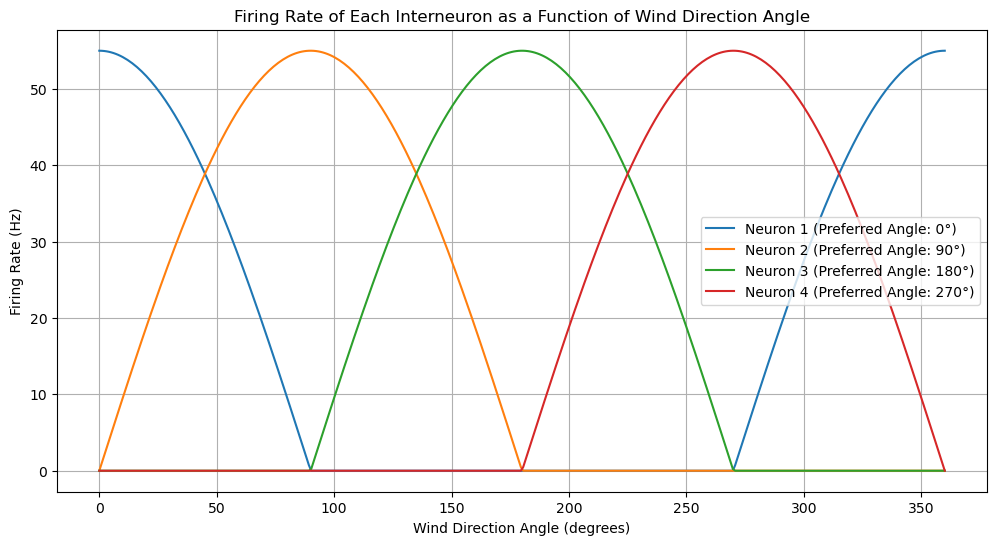

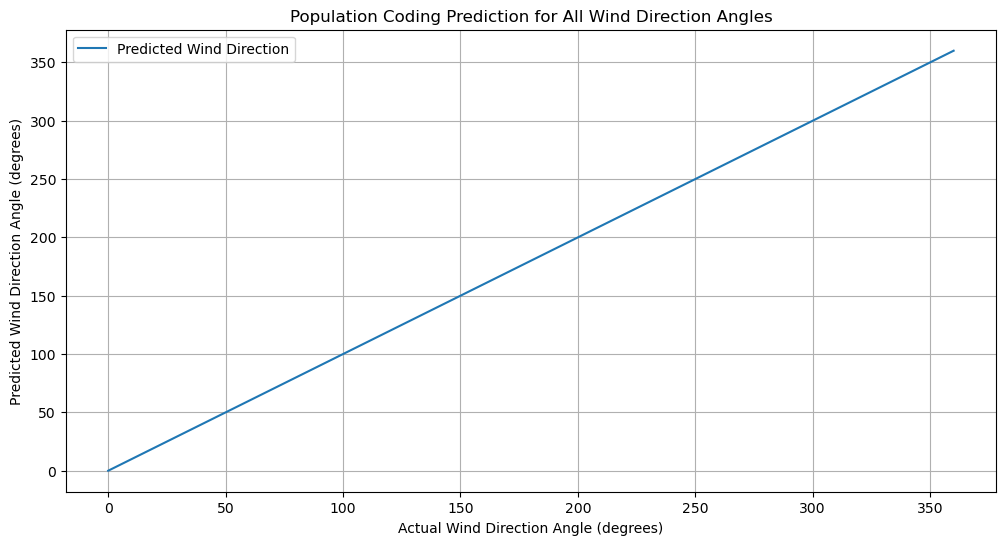

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def half_wave_rectification(x):
    return np.maximum(0, x)

def wind_direction_encoding(alpha):
    r0 = 55
    preferred_angles = [0, np.pi/2, np.pi, 3*np.pi/2]
    firing_rates = [r0 * np.cos(alpha - preferred_angle) for preferred_angle in preferred_angles]
    firing_rates = half_wave_rectification(firing_rates)
    x_component = sum(firing_rates[i] * np.cos(preferred_angles[i]) for i in range(4))
    y_component = sum(firing_rates[i] * np.sin(preferred_angles[i]) for i in range(4))
    predicted_alpha = np.arctan2(y_component, x_component)
    if predicted_alpha < 0:
        predicted_alpha += 2 * np.pi
    return firing_rates, predicted_alpha

angles = np.linspace(0, 2 * np.pi, 360)
firing_rates_all = []
predicted_angles = []

for alpha in angles:
    firing_rates, predicted_alpha = wind_direction_encoding(alpha)
    firing_rates_all.append(firing_rates)
    predicted_angles.append(predicted_alpha)

firing_rates_all = np.array(firing_rates_all)
predicted_angles = np.array(predicted_angles)

plt.figure(figsize=(12, 6))
for i, angle in enumerate([0, 90, 180, 270]):
    plt.plot(np.degrees(angles), firing_rates_all[:, i], label=f'Neuron {i+1} (Preferred Angle: {angle}°)')
plt.xlabel('Wind Direction Angle (degrees)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Firing Rate of Each Interneuron as a Function of Wind Direction Angle')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.degrees(angles), np.degrees(predicted_angles), label='Predicted Wind Direction')
plt.xlabel('Actual Wind Direction Angle (degrees)')
plt.ylabel('Predicted Wind Direction Angle (degrees)')
plt.title('Population Coding Prediction for All Wind Direction Angles')
plt.legend()
plt.grid(True)
plt.show()


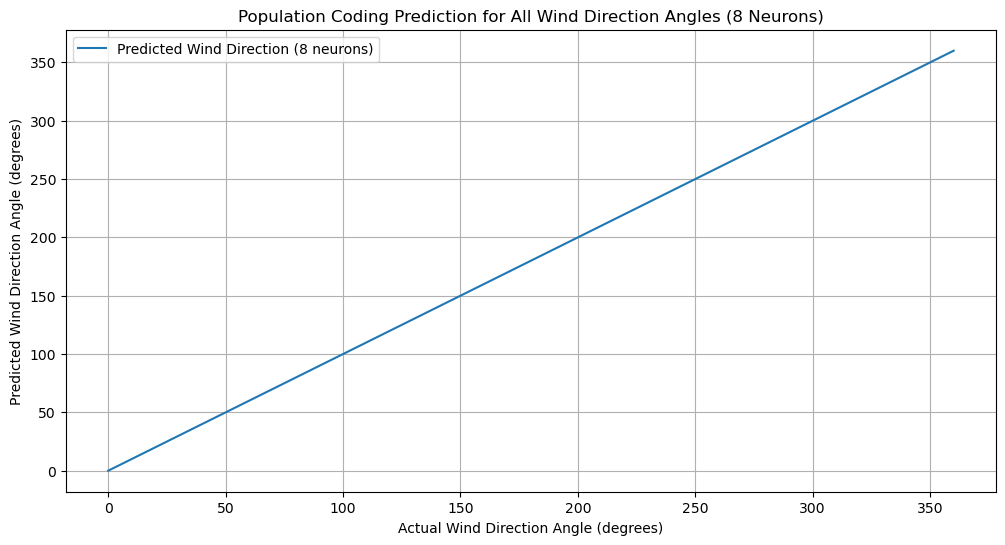

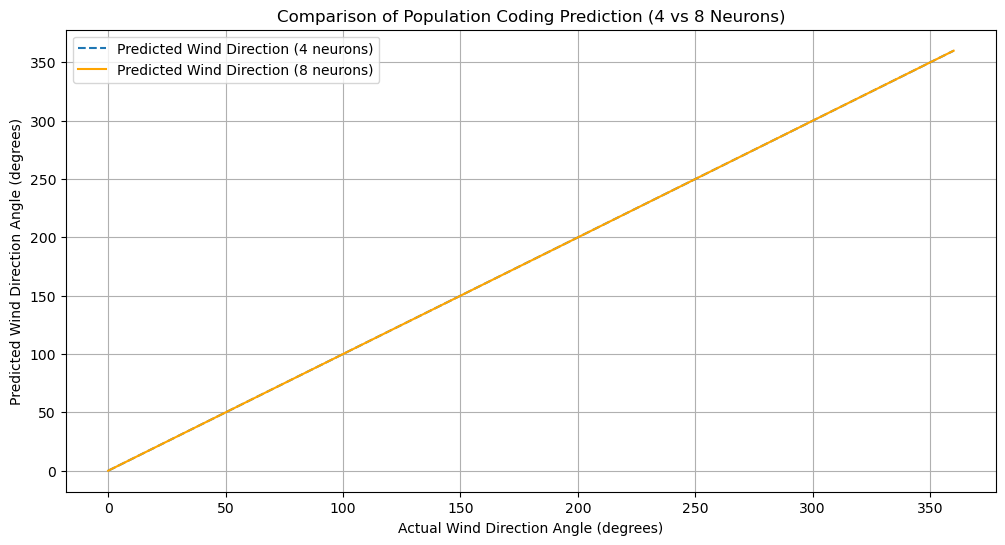

In [27]:
def half_wave_rectification(x):
    return np.maximum(0, x)

def wind_direction_encoding(alpha):
    r0 = 55
    preferred_angles = [0, np.pi/2, np.pi, 3*np.pi/2]
    firing_rates = [r0 * np.cos(alpha - preferred_angle) for preferred_angle in preferred_angles]
    firing_rates = half_wave_rectification(firing_rates)
    x_component = sum(firing_rates[i] * np.cos(preferred_angles[i]) for i in range(4))
    y_component = sum(firing_rates[i] * np.sin(preferred_angles[i]) for i in range(4))
    predicted_alpha = np.arctan2(y_component, x_component)
    if predicted_alpha < 0:
        predicted_alpha += 2 * np.pi
    return firing_rates, predicted_alpha

def wind_direction_encoding_8_neurons(alpha):
    r0 = 55
    preferred_angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)
    firing_rates = [r0 * np.cos(alpha - preferred_angle) for preferred_angle in preferred_angles]
    firing_rates = half_wave_rectification(firing_rates)
    x_component = sum(firing_rates[i] * np.cos(preferred_angles[i]) for i in range(8))
    y_component = sum(firing_rates[i] * np.sin(preferred_angles[i]) for i in range(8))
    predicted_alpha = np.arctan2(y_component, x_component)
    if predicted_alpha < 0:
        predicted_alpha += 2 * np.pi
    return firing_rates, predicted_alpha

angles = np.linspace(0, 2 * np.pi, 360)
predicted_angles_4 = np.array([wind_direction_encoding(alpha)[1] for alpha in angles])
predicted_angles_8 = np.array([wind_direction_encoding_8_neurons(alpha)[1] for alpha in angles])

plt.figure(figsize=(12, 6))
plt.plot(np.degrees(angles), np.degrees(predicted_angles_8), label='Predicted Wind Direction (8 neurons)')
plt.xlabel('Actual Wind Direction Angle (degrees)')
plt.ylabel('Predicted Wind Direction Angle (degrees)')
plt.title('Population Coding Prediction for All Wind Direction Angles (8 Neurons)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.degrees(angles), np.degrees(predicted_angles_4), label='Predicted Wind Direction (4 neurons)', linestyle='--')
plt.plot(np.degrees(angles), np.degrees(predicted_angles_8), label='Predicted Wind Direction (8 neurons)', color='orange')
plt.xlabel('Actual Wind Direction Angle (degrees)')
plt.ylabel('Predicted Wind Direction Angle (degrees)')
plt.title('Comparison of Population Coding Prediction (4 vs 8 Neurons)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
def wind_direction_encoding_noisy(alpha, num_neurons=4):
    r0 = 55  
    noise_mean = 0
    noise_std = 4
    if num_neurons == 4:
        preferred_angles = [0, np.pi/2, np.pi, 3*np.pi/2]  
    else:
        preferred_angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)  

    firing_rates = [r0 * np.cos(alpha - preferred_angle) + np.random.normal(noise_mean, noise_std) for preferred_angle in preferred_angles]
    firing_rates = half_wave_rectification(firing_rates)

    x_component = sum(firing_rates[i] * np.cos(preferred_angles[i]) for i in range(num_neurons))
    y_component = sum(firing_rates[i] * np.sin(preferred_angles[i]) for i in range(num_neurons))

    predicted_alpha = np.arctan2(y_component, x_component)
    if predicted_alpha < 0:
        predicted_alpha += 2 * np.pi

    return firing_rates, predicted_alpha


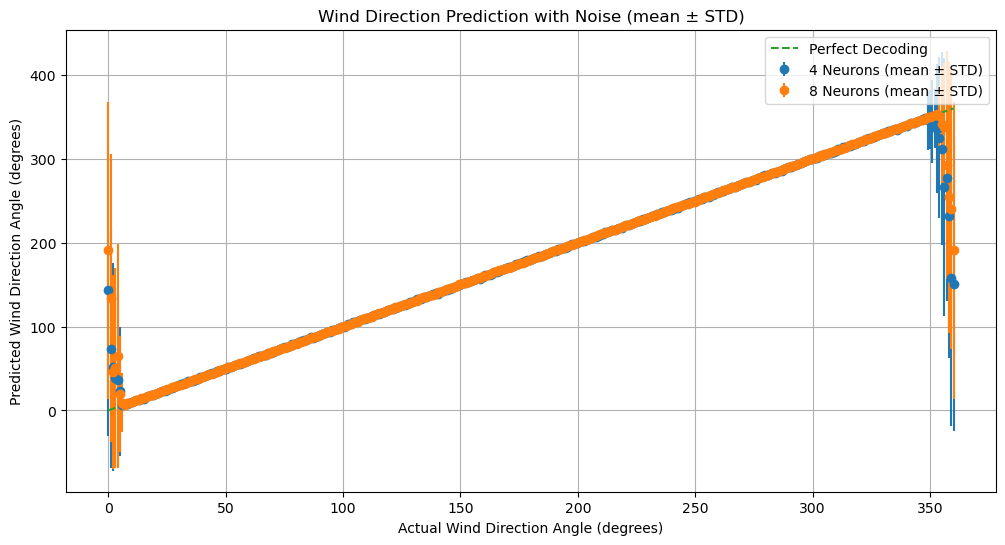

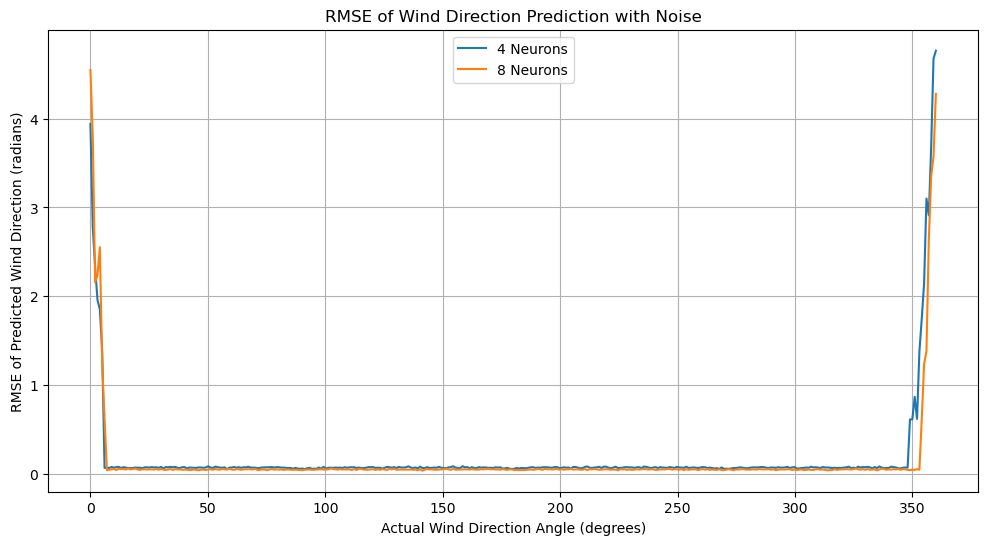

In [29]:
def simulate_trials(num_neurons=4, num_trials=100):
    angles = np.linspace(0, 2 * np.pi, 360)
    predicted_angles_all_trials = np.zeros((num_trials, len(angles)))

    for trial in range(num_trials):
        predicted_angles = []
        for alpha in angles:
            _, predicted_alpha = wind_direction_encoding_noisy(alpha, num_neurons=num_neurons)
            predicted_angles.append(predicted_alpha)
        predicted_angles_all_trials[trial, :] = predicted_angles

    return angles, predicted_angles_all_trials

angles, predicted_angles_4_trials = simulate_trials(num_neurons=4, num_trials=100)
_, predicted_angles_8_trials = simulate_trials(num_neurons=8, num_trials=100)

mean_predicted_angles_4 = np.mean(predicted_angles_4_trials, axis=0)
std_predicted_angles_4 = np.std(predicted_angles_4_trials, axis=0)
mean_predicted_angles_8 = np.mean(predicted_angles_8_trials, axis=0)
std_predicted_angles_8 = np.std(predicted_angles_8_trials, axis=0)

rmse_4 = np.sqrt(np.mean((predicted_angles_4_trials - angles)**2, axis=0))
rmse_8 = np.sqrt(np.mean((predicted_angles_8_trials - angles)**2, axis=0))

plt.figure(figsize=(12, 6))
plt.errorbar(np.degrees(angles), np.degrees(mean_predicted_angles_4), yerr=np.degrees(std_predicted_angles_4), label='4 Neurons (mean ± STD)', fmt='o')
plt.errorbar(np.degrees(angles), np.degrees(mean_predicted_angles_8), yerr=np.degrees(std_predicted_angles_8), label='8 Neurons (mean ± STD)', fmt='o')
plt.plot(np.degrees(angles), np.degrees(angles), label='Perfect Decoding', linestyle='--')
plt.xlabel('Actual Wind Direction Angle (degrees)')
plt.ylabel('Predicted Wind Direction Angle (degrees)')
plt.title('Wind Direction Prediction with Noise (mean ± STD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.degrees(angles), rmse_4, label='4 Neurons')
plt.plot(np.degrees(angles), rmse_8, label='8 Neurons')
plt.xlabel('Actual Wind Direction Angle (degrees)')
plt.ylabel('RMSE of Predicted Wind Direction (radians)')
plt.title('RMSE of Wind Direction Prediction with Noise')
plt.legend()
plt.grid(True)
plt.show()


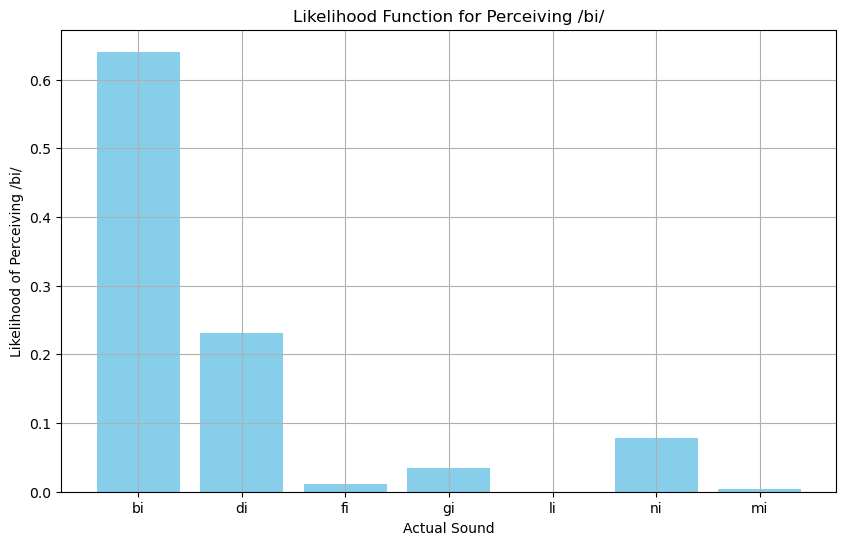

In [30]:
import pandas as pd
file_path = 'percieved_b.csv'  
data = pd.read_csv(file_path)

actual_sounds = ['bi', 'di', 'fi', 'gi', 'li', 'ni', 'mi']
likelihoods = {}

for sound in actual_sounds:
    likelihoods[sound] = sum(data['actual_sound'] == sound) / len(data)

plt.figure(figsize=(10, 6))
plt.bar(likelihoods.keys(), likelihoods.values(), color='skyblue')
plt.xlabel('Actual Sound')
plt.ylabel('Likelihood of Perceiving /bi/')
plt.title('Likelihood Function for Perceiving /bi/')
plt.grid(True)
plt.show()

In [31]:
mle_sound = max(likelihoods, key=likelihoods.get)

print(f"The MLE for the first syllable of the woman's name is: {mle_sound}")

The MLE for the first syllable of the woman's name is: bi


In [33]:
priors = {
    'Billie': 1.1 / 1000,
    'Dillie': 0.2 / 1000,
    'Filly': 0.01 / 1000,
    'Gilly': 15.3 / 1000,
    'Lily': 18.1 / 1000,
    'Nilly': 33.7 / 1000,
    'Millie': 2.5 / 1000
}

prior_likelihood_map = {
    'Billie': 'bi',
    'Dillie': 'di',
    'Filly': 'fi',
    'Gilly': 'gi',
    'Lily': 'li',
    'Nilly': 'ni',
    'Millie': 'mi'
}

posteriors = {}
for name, prior in priors.items():
    sound = prior_likelihood_map[name]  
    if sound in likelihoods:
        posteriors[name] = likelihoods[sound] * prior

total_posterior = sum(posteriors.values())
posteriors = {name: posterior / total_posterior for name, posterior in posteriors.items()}

map_name = max(posteriors, key=posteriors.get)

print(f"The MAP estimate for the woman's name is: {map_name}")

for name, posterior in posteriors.items():
    print(f"{name}: {posterior:.4f}")



The MAP estimate for the woman's name is: Nilly
Billie: 0.1792
Dillie: 0.0117
Filly: 0.0000
Gilly: 0.1368
Lily: 0.0000
Nilly: 0.6697
Millie: 0.0025


In [34]:
priors_country2 = {
    'Billie': 40 / 1000,
    'Dillie': 5 / 1000,
    'Filly': 1 / 1000,
    'Gilly': 10 / 1000,
    'Lily': 20 / 1000,
    'Nilly': 2 / 1000,
    'Millie': 22 / 1000
}

posteriors_country2 = {}
for name, prior in priors_country2.items():
    sound = prior_likelihood_map[name]  
    if sound in likelihoods:
        posteriors_country2[name] = likelihoods[sound] * prior

total_posterior_country2 = sum(posteriors_country2.values())
posteriors_country2 = {name: posterior / total_posterior_country2 for name, posterior in posteriors_country2.items()}

map_name_country2 = max(posteriors_country2, key=posteriors_country2.get)

print(f"The MAP estimate for the woman's name in the second country is: {map_name_country2}")

for name, posterior in posteriors_country2.items():
    print(f"{name}: {posterior:.4f}")


The MAP estimate for the woman's name in the second country is: Billie
Billie: 0.9358
Dillie: 0.0421
Filly: 0.0004
Gilly: 0.0128
Lily: 0.0000
Nilly: 0.0057
Millie: 0.0031


In [35]:
import math

def entropy(probabilities):
    return -sum(p * math.log2(p) for p in probabilities if p > 0)

P_L = 0.5
P_C = 0.5
P_F_given_L = 0.75
P_F_given_C = 0.125

P_F = P_F_given_L * P_L + P_F_given_C * P_C
P_not_F = 1 - P_F

entropy_equal_exposure = entropy([P_F, P_not_F])

P_L_99 = 0.01
P_C_99 = 0.99

P_F_99 = P_F_given_L * P_L_99 + P_F_given_C * P_C_99
P_not_F_99 = 1 - P_F_99

entropy_99_cinnamon = entropy([P_F_99, P_not_F_99])

(entropy_equal_exposure, entropy_99_cinnamon)


(0.9886994082884974, 0.5608563762191029)

In [36]:
P_L = 0.4
P_C = 0.6
P_F_given_L = 0.75
P_F_given_C = 0.125

P_F = P_F_given_L * P_L + P_F_given_C * P_C
P_not_F = 1 - P_F

H_F = entropy([P_F, P_not_F])

P_not_F_given_L = 1 - P_F_given_L
P_not_F_given_C = 1 - P_F_given_C

H_F_given_L = entropy([P_F_given_L, P_not_F_given_L])
H_F_given_C = entropy([P_F_given_C, P_not_F_given_C])

H_F_given_S = P_L * H_F_given_L + P_C * H_F_given_C

I_F_S = H_F - H_F_given_S

print(f"Conditional Entropy H(F|S): {H_F_given_S:.3f} bits")
print(f"Mutual Information I(F; S): {I_F_S:.3f} bits")

Conditional Entropy H(F|S): 0.651 bits
Mutual Information I(F; S): 0.304 bits


In [24]:
def joint_entropy(joint_probabilities):
    return -sum(p * math.log2(p) for p in joint_probabilities if p > 0)

P_F = 0.375
P_not_F = 0.625

joint_probs_marcel = [P_F, P_not_F]

H_XY_marcel = joint_entropy(joint_probs_marcel)

H_X_marcel = entropy([P_F, P_not_F])
I_XY_marcel = H_X_marcel + H_X_marcel - H_XY_marcel

joint_probs_aunt = [
    P_F * P_F,         
    P_F * P_not_F,     
    P_not_F * P_F,     
    P_not_F * P_not_F  
]

H_XY_aunt = joint_entropy(joint_probs_aunt)

I_XY_aunt = 2 * H_X_marcel - H_XY_aunt

print(f"Marcel's neurons - Joint Entropy: {H_XY_marcel:.3f} bits, Mutual Information: {I_XY_marcel:.3f} bits")
print(f"Aunt Léonie's neurons - Joint Entropy: {H_XY_aunt:.3f} bits, Mutual Information: {I_XY_aunt:.3f} bits")


Marcel's neurons - Joint Entropy: 0.954 bits, Mutual Information: 0.954 bits
Aunt Léonie's neurons - Joint Entropy: 1.909 bits, Mutual Information: 0.000 bits


In [25]:
P_L = 0.4
P_C = 0.6
P_F_given_L = 0.75
P_F_given_C = 0.125
P_F = 0.375
P_not_F = 0.625

P_not_F_given_L = 1 - P_F_given_L
P_not_F_given_C = 1 - P_F_given_C

H_F_given_L = entropy([P_F_given_L, P_not_F_given_L])
H_F_given_C = entropy([P_F_given_C, P_not_F_given_C])

H_F_given_S = P_L * H_F_given_L + P_C * H_F_given_C

H_H1_H2_given_smell_marcel = H_F_given_S
H_H1_H2_marcel = entropy([P_F, P_not_F])

I_H1_H2_smell_marcel = H_H1_H2_marcel - H_H1_H2_given_smell_marcel

H_H1_given_smell_aunt = H_F_given_S
H_H2_given_smell_aunt = H_F_given_S
H_H1_H2_given_smell_aunt = H_H1_given_smell_aunt + H_H2_given_smell_aunt
H_H1_H2_aunt = 1.909

I_H1_H2_smell_aunt = H_H1_H2_aunt - H_H1_H2_given_smell_aunt

print(f"Marcel's Neurons - Mutual Information I(H1, H2; smell): {I_H1_H2_smell_marcel:.3f} bits")
print(f"Aunt Léonie's Neurons - Mutual Information I(H1, H2; smell): {I_H1_H2_smell_aunt:.3f} bits")

Marcel's Neurons - Mutual Information I(H1, H2; smell): 0.304 bits
Aunt Léonie's Neurons - Mutual Information I(H1, H2; smell): 0.608 bits
